<a href="https://colab.research.google.com/github/corjqnrl/Datasciene_project/blob/main/DatascienceTeamProject_Team8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import csv
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Loading file
train = pd.read_csv('/content/drive/MyDrive/데이터사이언스_lab/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이터사이언스_lab/test.csv')
train_c = train.copy()
train_c

Mounted at /content/drive


Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[878049 rows x 9 columns]

In [ ]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


# Data Exploration

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_c['Category'].value_counts()

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

<Axes: xlabel='Hour', ylabel='count'>

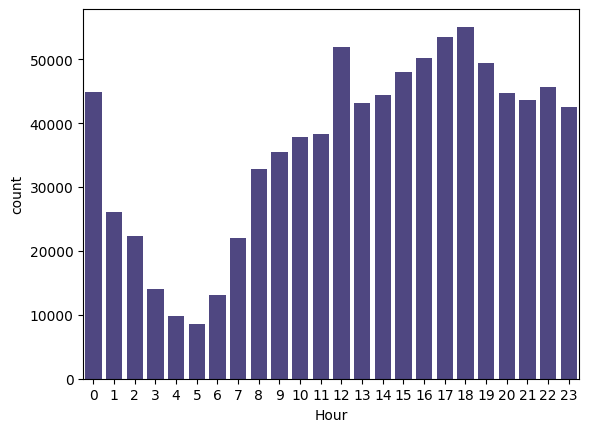

In [ ]:
# Crime Distribution by time
train_c['Dates'] = pd.to_datetime(train_c['Dates'])
train_c['Hour'] = train_c['Dates'].dt.hour

sns.countplot(data=train_c, x='Hour', color = 'darkslateblue')

The time when crime occurs less frequently from 1:00 to 7:00 and the crime rate is high is 12:00 and 17:00 to 18:00.

In [ ]:
# Outlier
X_outliers=train_c['X']==train_c['X'].max()
Y_outliers=train_c['Y']==train_c['Y'].max()

outlier=train_c[X_outliers&Y_outliers]
print(outlier.shape)
outlier

(67, 10)


Dates               Category  \
660485 2005-12-30 17:00:00          LARCENY/THEFT   
660711 2005-12-30 00:34:00                ASSAULT   
660712 2005-12-30 00:34:00                ASSAULT   
661106 2005-12-29 00:07:00           NON-CRIMINAL   
666430 2005-11-30 11:25:00         OTHER OFFENSES   
...                    ...                    ...   
844995 2003-06-11 08:49:00         OTHER OFFENSES   
845842 2003-06-09 09:25:00         OTHER OFFENSES   
852880 2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248 2003-04-14 16:30:00                ROBBERY   
871198 2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                      TRAFFIC VIOLATION  Wednesday  TENDERLOIN   
...                                       ...        ...         ...   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday   INGLESIDE   
845842  DRIVERS LICENSE, SUSPENDED OR REVOKED     Monday   INGLESIDE   
852880            FORCIBLE RAPE, BODILY FORCE     Friday    SOUTHERN   
857248       ROBBERY ON THE STREET, STRONGARM     Monday     BAYVIEW   
871198           PETTY THEFT FROM LOCKED AUTO  Wednesday    SOUTHERN   

                              Resolution  \
660485                              NONE   
660711                    ARREST, BOOKED   
660712                    ARREST, BOOKED   
661106                 PSYCHOPATHIC CASE   
666430                     ARREST, CITED   
...                                  ...   
844995                     ARREST, CITED   
845842                     ARREST, CITED   
852880  COMPLAINANT REFUSES TO PROSECUTE   
857248  COMPLAINANT REFUSES TO PROSECUTE   
871198                              NONE   

                                        Address      X     Y  Hour  
660485              5THSTNORTH ST / OFARRELL ST -120.5  90.0    17  
660711          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0     0  
660712          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0     0  
661106                  5THSTNORTH ST / EDDY ST -120.5  90.0     0  
666430                 5THSTNORTH ST / ELLIS ST -120.5  90.0    11  
...                                         ...    ...   ...   ...  
844995  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0     8  
845842  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0     9  
852880           3RD ST / JAMES LICK FREEWAY HY -120.5  90.0     1  
857248                     GILMAN AV / FITCH ST -120.5  90.0    16  
871198      SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0    12  

[67 rows x 10 columns]

Delete outliers because the graph is not represented well due to outliers.

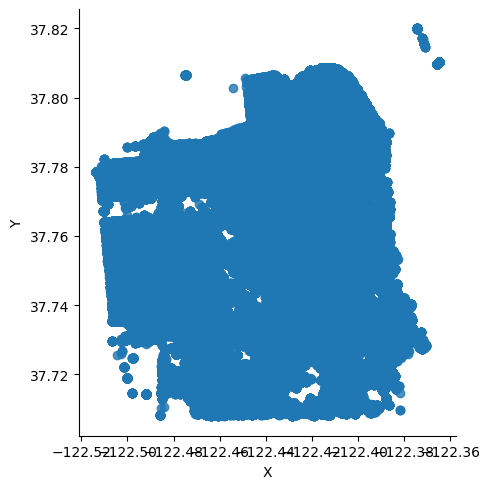

In [ ]:
non_outliers=train_c[~(X_outliers&Y_outliers)]
sns.lmplot(data=non_outliers, x='X', y='Y', fit_reg=False)

Visualization with the exception of outliers visualizes it in the shape of a San Francisco map

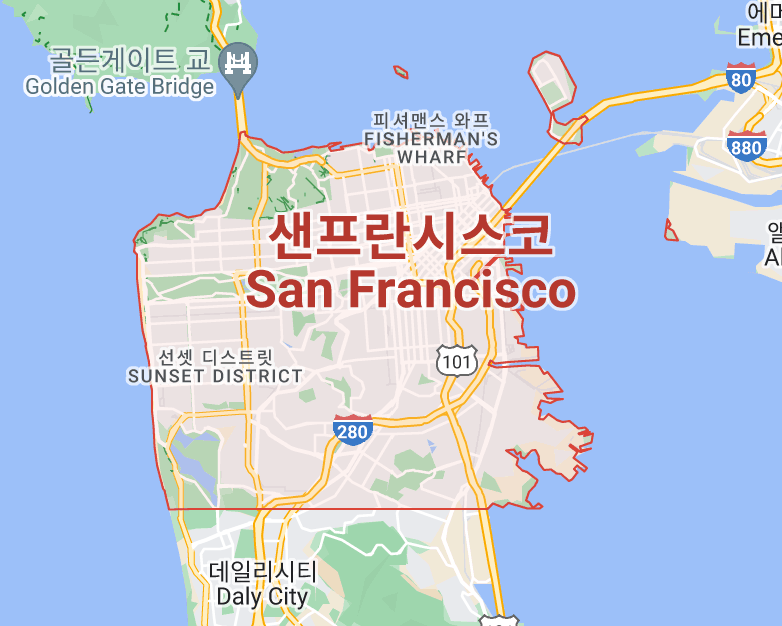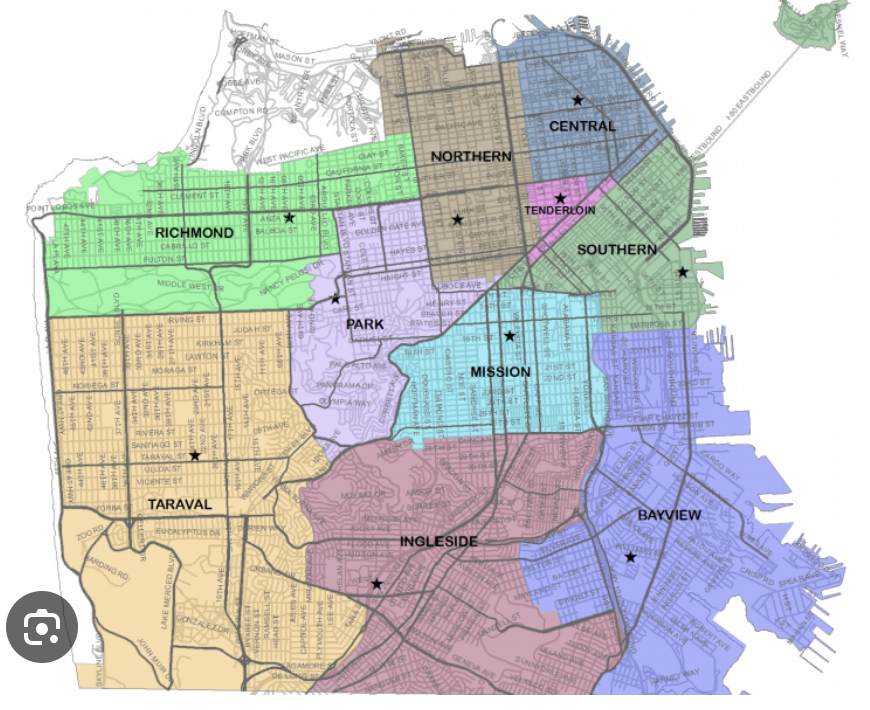

<Axes: xlabel='count', ylabel='PdDistrict'>

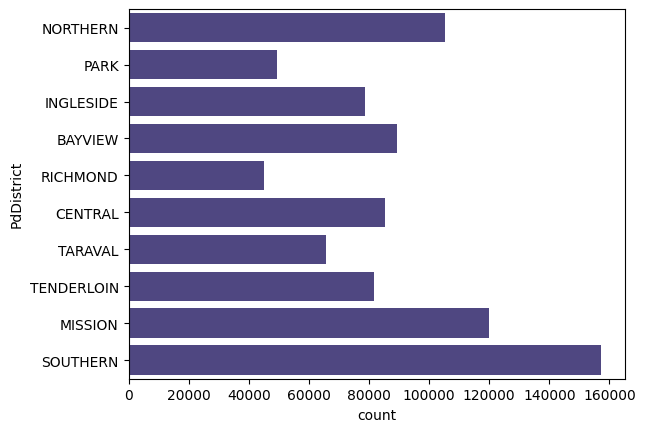

In [ ]:
category_order = ['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL', 'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN']

# Seaborn barplot
sns.countplot(data=non_outliers,y='PdDistrict', order = category_order, color = 'darkslateblue')

The area with the most crimes is 'SOUTHERN', which has almost 160000 cases, followed by 'MISSION' and 'NORTHERN'.

<Axes: xlabel='count', ylabel='Category'>

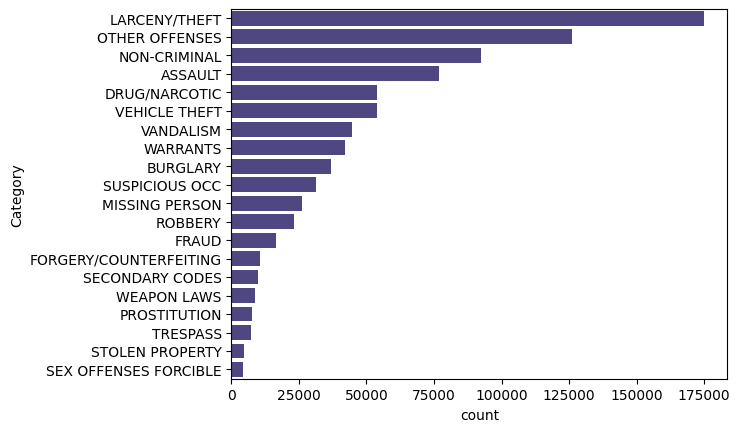

In [ ]:
# Category counts
sns.countplot(y='Category', data=non_outliers, order=non_outliers['Category'].value_counts().index[:20], color = 'darkslateblue')

Visualize PdDistrcit of the top 5 crime categories(Below)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


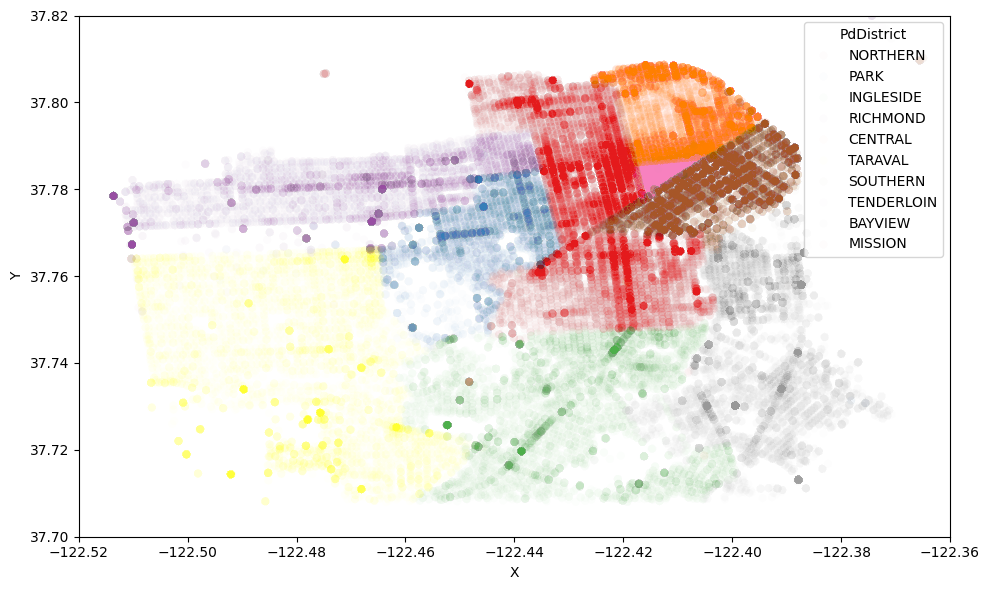

In [ ]:
theft_df = non_outliers[non_outliers['Category'] == 'LARCENY/THEFT']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', alpha=0.01, data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

A number of theft crimes have occurred in NORTHERN, SOUTHERN, CENTRAL

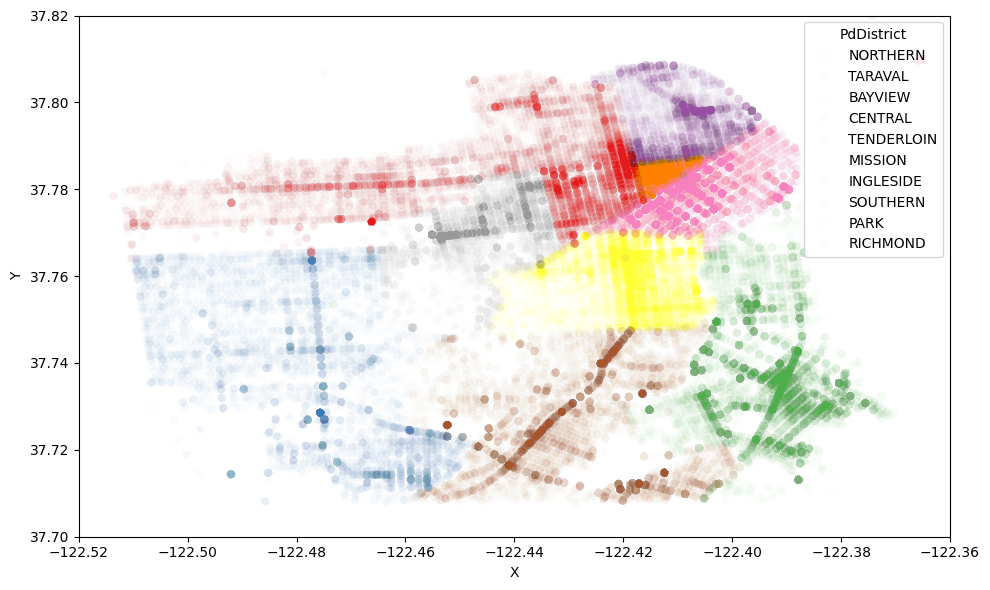

In [ ]:
theft_df = non_outliers[non_outliers['Category'] == 'OTHER OFFENSES']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', alpha=0.01, data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

Other offences in MISSION, SOUTHERN, TENDERLOIN

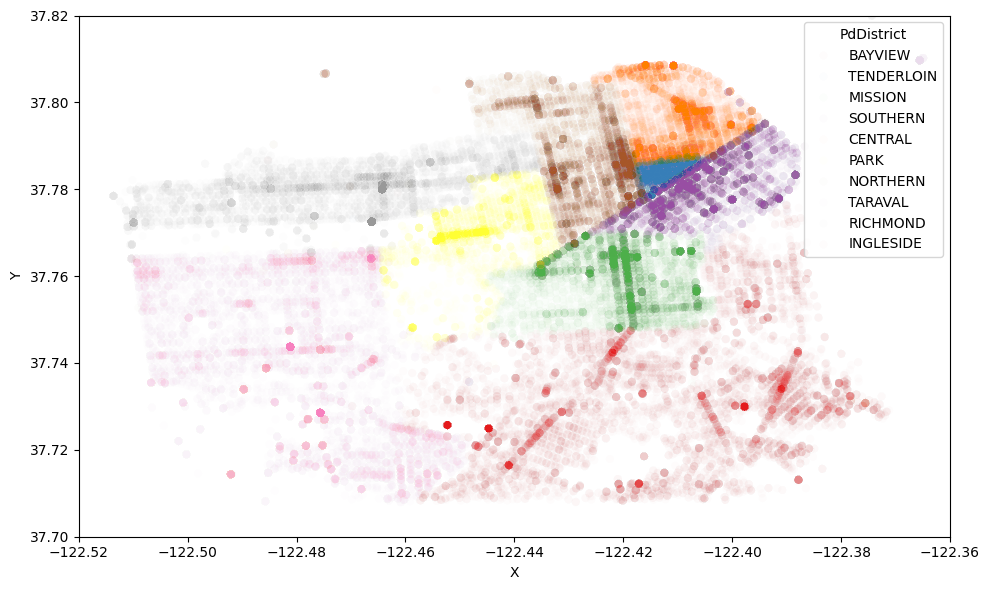

In [ ]:
theft_df = non_outliers[non_outliers['Category'] == 'NON-CRIMINAL']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', alpha=0.01, data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

The number of 'NON-CRIMINAL' is high in NORTHERN, CENTRAL, TENDERLOIN, MISSION, and SOUTHERN

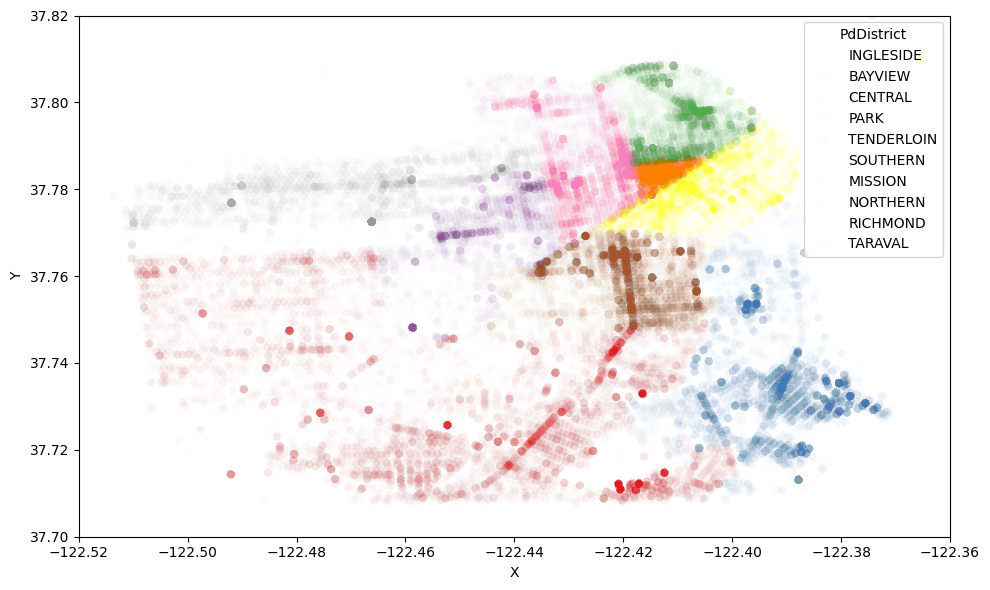

In [ ]:
theft_df = non_outliers[non_outliers['Category'] == 'ASSAULT']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', alpha=0.01, data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

ASSAULT can be seen to occur TENDERLOIN, CENTRAL, MISSION and in parts of BAYVIEW.

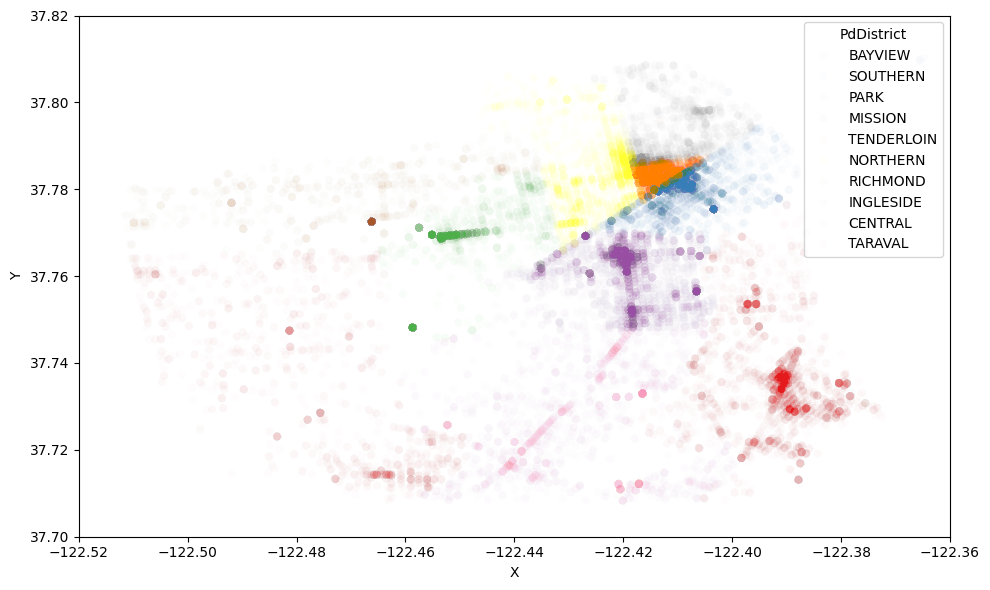

In [ ]:
theft_df = non_outliers[non_outliers['Category'] == 'DRUG/NARCOTIC']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', alpha=0.01, data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

A lot of drug crimes in TENDERLOIN

If you classify it in this way, you can see which crimes usually occur in which area. As a result of comparison, it can be seen that many crimes occurred in most of the TENDERLOIN, MISSION, and SOUTHERN areas. However, in the case of TENDERLOIN, the crime itself is not very high because the area itself is narrow, but it should be taken into account that the graph continues to show strong results. And it can be seen that crimes frequently occurred not only in a certain area but also at some point.

It can be seen that 'LARCENY/THEFT' is the most common crime type, and most of the cases are divided into 'OTHER OFFENSES' and 'NON-CRIMINAL'.

# Data Preprocessing

In [ ]:
# Outlier
X_outliers=train['X']==train['X'].max()
Y_outliers=train['Y']==train['Y'].max()

outlier=train[X_outliers&Y_outliers]

#non outlier
non_outliers=train[~(X_outliers&Y_outliers)]

In [ ]:
non_outliers

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[877982 rows x 9 columns]

In [ ]:
# DayOfWeek -> 0-6 = Monday-Sunday
non_outliers.loc[non_outliers['DayOfWeek']=='Monday','DayOfWeek']=0
non_outliers.loc[non_outliers['DayOfWeek']=='Tuesday','DayOfWeek']=1
non_outliers.loc[non_outliers['DayOfWeek']=='Wednesday','DayOfWeek']=2
non_outliers.loc[non_outliers['DayOfWeek']=='Thursday','DayOfWeek']=3
non_outliers.loc[non_outliers['DayOfWeek']=='Friday','DayOfWeek']=4
non_outliers.loc[non_outliers['DayOfWeek']=='Saturday','DayOfWeek']=5
non_outliers.loc[non_outliers['DayOfWeek']=='Sunday','DayOfWeek']=6

non_outliers

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
0                                  WARRANT ARREST         2   NORTHERN   
1                        TRAFFIC VIOLATION ARREST         2   NORTHERN   
2                        TRAFFIC VIOLATION ARREST         2   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO         2   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO         2       PARK   
...                                           ...       ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN         0    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO         0  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO         0   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES         0   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)         0    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[877982 rows x 9 columns]

In [ ]:
# Address one hot encoding

def one_hot_encode(Address):

    if isinstance(Address, str):
        if 'ST' in Address or 'CROSS' in Address or 'AV' in Address:
            return 1
        else:
            return 0
    else:
        # Return 0 if not a string
        return 0

# Apply one hot encoding
non_outliers['ST_or_CROSS_or_AV'] = non_outliers['Address'].apply(one_hot_encode)
non_outliers = non_outliers.drop(columns=['Address'])

non_outliers

<ipython-input-149-dadcc7f61ec6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['ST_or_CROSS_or_AV'] = non_outliers['Address'].apply(one_hot_encode)


Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
0                                  WARRANT ARREST         2   NORTHERN   
1                        TRAFFIC VIOLATION ARREST         2   NORTHERN   
2                        TRAFFIC VIOLATION ARREST         2   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO         2   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO         2       PARK   
...                                           ...       ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN         0    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO         0  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO         0   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES         0   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)         0    BAYVIEW   

            Resolution           X          Y  ST_or_CROSS_or_AV  
0       ARREST, BOOKED -122.425892  37.774599                  1  
1       ARREST, BOOKED -122.425892  37.774599                  1  
2       ARREST, BOOKED -122.424363  37.800414                  1  
3                 NONE -122.426995  37.800873                  1  
4                 NONE -122.438738  37.771541                  1  
...                ...         ...        ...                ...  
878044            NONE -122.459033  37.714056                  1  
878045            NONE -122.447364  37.731948                  1  
878046            NONE -122.403390  37.780266                  1  
878047            NONE -122.390531  37.780607                  1  
878048            NONE -122.394926  37.738212                  1  

[877982 rows x 9 columns]

In [ ]:
# PdDistrict
non_outliers.loc[non_outliers['PdDistrict']=='SOUTHERN','PdDistrict']=0
non_outliers.loc[non_outliers['PdDistrict']=='MISSION','PdDistrict']=1
non_outliers.loc[non_outliers['PdDistrict']=='NORTHERN','PdDistrict']=2
non_outliers.loc[non_outliers['PdDistrict']=='BAYVIEW','PdDistrict']=3
non_outliers.loc[non_outliers['PdDistrict']=='CENTRAL','PdDistrict']=4
non_outliers.loc[non_outliers['PdDistrict']=='TENDERLOIN','PdDistrict']=5
non_outliers.loc[non_outliers['PdDistrict']=='INGLESIDE','PdDistrict']=6
non_outliers.loc[non_outliers['PdDistrict']=='TARAVAL','PdDistrict']=7
non_outliers.loc[non_outliers['PdDistrict']=='PARK','PdDistrict']=8
non_outliers.loc[non_outliers['PdDistrict']=='RICHMOND','PdDistrict']=9

non_outliers

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
0                                  WARRANT ARREST         2          2   
1                        TRAFFIC VIOLATION ARREST         2          2   
2                        TRAFFIC VIOLATION ARREST         2          2   
3                    GRAND THEFT FROM LOCKED AUTO         2          2   
4                    GRAND THEFT FROM LOCKED AUTO         2          8   
...                                           ...       ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN         0          7   
878045               GRAND THEFT FROM LOCKED AUTO         0          6   
878046               GRAND THEFT FROM LOCKED AUTO         0          0   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES         0          0   
878048                   CHECKS, FORGERY (FELONY)         0          3   

            Resolution           X          Y  ST_or_CROSS_or_AV  
0       ARREST, BOOKED -122.425892  37.774599                  1  
1       ARREST, BOOKED -122.425892  37.774599                  1  
2       ARREST, BOOKED -122.424363  37.800414                  1  
3                 NONE -122.426995  37.800873                  1  
4                 NONE -122.438738  37.771541                  1  
...                ...         ...        ...                ...  
878044            NONE -122.459033  37.714056                  1  
878045            NONE -122.447364  37.731948                  1  
878046            NONE -122.403390  37.780266                  1  
878047            NONE -122.390531  37.780607                  1  
878048            NONE -122.394926  37.738212                  1  

[877982 rows x 9 columns]

In [ ]:
# Delete 'Resolution', 'Descript' columns
non_outliers=non_outliers.drop(columns=['Resolution'])
non_outliers =non_outliers.drop(columns=['Descript'])

In [ ]:
import numpy as np

non_outliers['Dates'].dtypes

dtype('O')

In [ ]:
# Divide 'Hour' from 'Dates'
non_outliers['Dates'] = pd.to_datetime(non_outliers['Dates'])
non_outliers['Hour'] = non_outliers['Dates'].dt.hour
non_outliers = non_outliers.drop(columns=['Dates'])

non_outliers

Category DayOfWeek PdDistrict           X          Y  \
0                     WARRANTS         2          2 -122.425892  37.774599   
1               OTHER OFFENSES         2          2 -122.425892  37.774599   
2               OTHER OFFENSES         2          2 -122.424363  37.800414   
3                LARCENY/THEFT         2          2 -122.426995  37.800873   
4                LARCENY/THEFT         2          8 -122.438738  37.771541   
...                        ...       ...        ...         ...        ...   
878044                 ROBBERY         0          7 -122.459033  37.714056   
878045           LARCENY/THEFT         0          6 -122.447364  37.731948   
878046           LARCENY/THEFT         0          0 -122.403390  37.780266   
878047               VANDALISM         0          0 -122.390531  37.780607   
878048  FORGERY/COUNTERFEITING         0          3 -122.394926  37.738212   

        ST_or_CROSS_or_AV  Hour  
0                       1    23  
1                       1    23  
2                       1    23  
3                       1    23  
4                       1    23  
...                   ...   ...  
878044                  1     0  
878045                  1     0  
878046                  1     0  
878047                  1     0  
878048                  1     0  

[877982 rows x 7 columns]

In [ ]:
# Convert target variables to numbers by grouping similar types together
non_outliers.replace('ARSON', 0, inplace=True)
non_outliers.replace('ASSAULT', 1, inplace=True)
non_outliers.replace('BAD CHECKS', 2, inplace=True)
non_outliers.replace('BRIBERY', 3, inplace=True)
non_outliers.replace('BURGLARY', 4, inplace=True)
non_outliers.replace('DISORDERLY CONDUCT', 1, inplace=True)
non_outliers.replace('DRIVING UNDER THE INFLUENCE', 5, inplace=True)
non_outliers.replace('DRUG/NARCOTIC', 6, inplace=True)
non_outliers.replace('DRUNKENNESS', 5, inplace=True)
non_outliers.replace('EMBEZZLEMENT', 7, inplace=True)
non_outliers.replace('EXTORTION', 4, inplace=True)
non_outliers.replace('FAMILY OFFENSES', 8, inplace=True)
non_outliers.replace('FORGERY/COUNTERFEITING', 9, inplace=True)
non_outliers.replace('FRAUD', 10, inplace=True)
non_outliers.replace('GAMBLING', 11, inplace=True)
non_outliers.replace('KIDNAPPING', 12, inplace=True)
non_outliers.replace('LARCENY/THEFT', 4, inplace=True)
non_outliers.replace('LIQUOR LAWS', 13, inplace=True)
non_outliers.replace('LOITERING', 14, inplace=True)
non_outliers.replace('MISSING PERSON', 15, inplace=True)
non_outliers.replace('NON-CRIMINAL', 16, inplace=True)
non_outliers.replace('OTHER OFFENSES', 17, inplace=True)
non_outliers.replace('PORNOGRAPHY/OBSCENE MAT', 18, inplace=True)
non_outliers.replace('PROSTITUTION', 18, inplace=True)
non_outliers.replace('RECOVERED VEHICLE', 19, inplace=True)
non_outliers.replace('ROBBERY', 4, inplace=True)
non_outliers.replace('RUNAWAY', 20, inplace=True)
non_outliers.replace('SECONDARY CODES', 21, inplace=True)
non_outliers.replace('SEX OFFENSES FORCIBLE', 18, inplace=True)
non_outliers.replace('SEX OFFENSES NON FORCIBLE', 18, inplace=True)
non_outliers.replace('STOLEN PROPERTY', 4, inplace=True)
non_outliers.replace('SUICIDE', 22, inplace=True)
non_outliers.replace('SUSPICIOUS OCC', 14, inplace=True)
non_outliers.replace('TREA', 23, inplace=True)
non_outliers.replace('TRESPASS', 23, inplace=True)
non_outliers.replace('VANDALISM', 24, inplace=True)
non_outliers.replace('VEHICLE THEFT', 25, inplace=True)
non_outliers.replace('WARRANTS', 26, inplace=True)
non_outliers.replace('WEAPON LAWS', 27, inplace=True)

In [ ]:
non_outliers

Category  DayOfWeek  PdDistrict           X          Y  \
0             26          2           2 -122.425892  37.774599   
1             17          2           2 -122.425892  37.774599   
2             17          2           2 -122.424363  37.800414   
3              4          2           2 -122.426995  37.800873   
4              4          2           8 -122.438738  37.771541   
...          ...        ...         ...         ...        ...   
878044         4          0           7 -122.459033  37.714056   
878045         4          0           6 -122.447364  37.731948   
878046         4          0           0 -122.403390  37.780266   
878047        24          0           0 -122.390531  37.780607   
878048         9          0           3 -122.394926  37.738212   

        ST_or_CROSS_or_AV  Hour  
0                       1    23  
1                       1    23  
2                       1    23  
3                       1    23  
4                       1    23  
...                   ...   ...  
878044                  1     0  
878045                  1     0  
878046                  1     0  
878047                  1     0  
878048                  1     0  

[877982 rows x 7 columns]

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 100
shuffle = True
test_size_ratio = 0.2
feature_columns = list(non_outliers.columns.difference(['Category']))
X = non_outliers[feature_columns]
y = non_outliers['Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=random_state, shuffle=shuffle)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(702385, 6) (175597, 6) (702385,) (175597,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
scoring = "neg_mean_squared_error"

models = {}

In [ ]:
model = DecisionTreeClassifier(random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 10, 20],
    "ccp_alpha": [0.0, 0.01],
}

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best CV score: {:.6f}".format(grid_search.best_score_))

models["Decision Tree"] = grid_search.best_estimator_

Best parameters:  {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_split': 2}
Best CV score: -119.333665


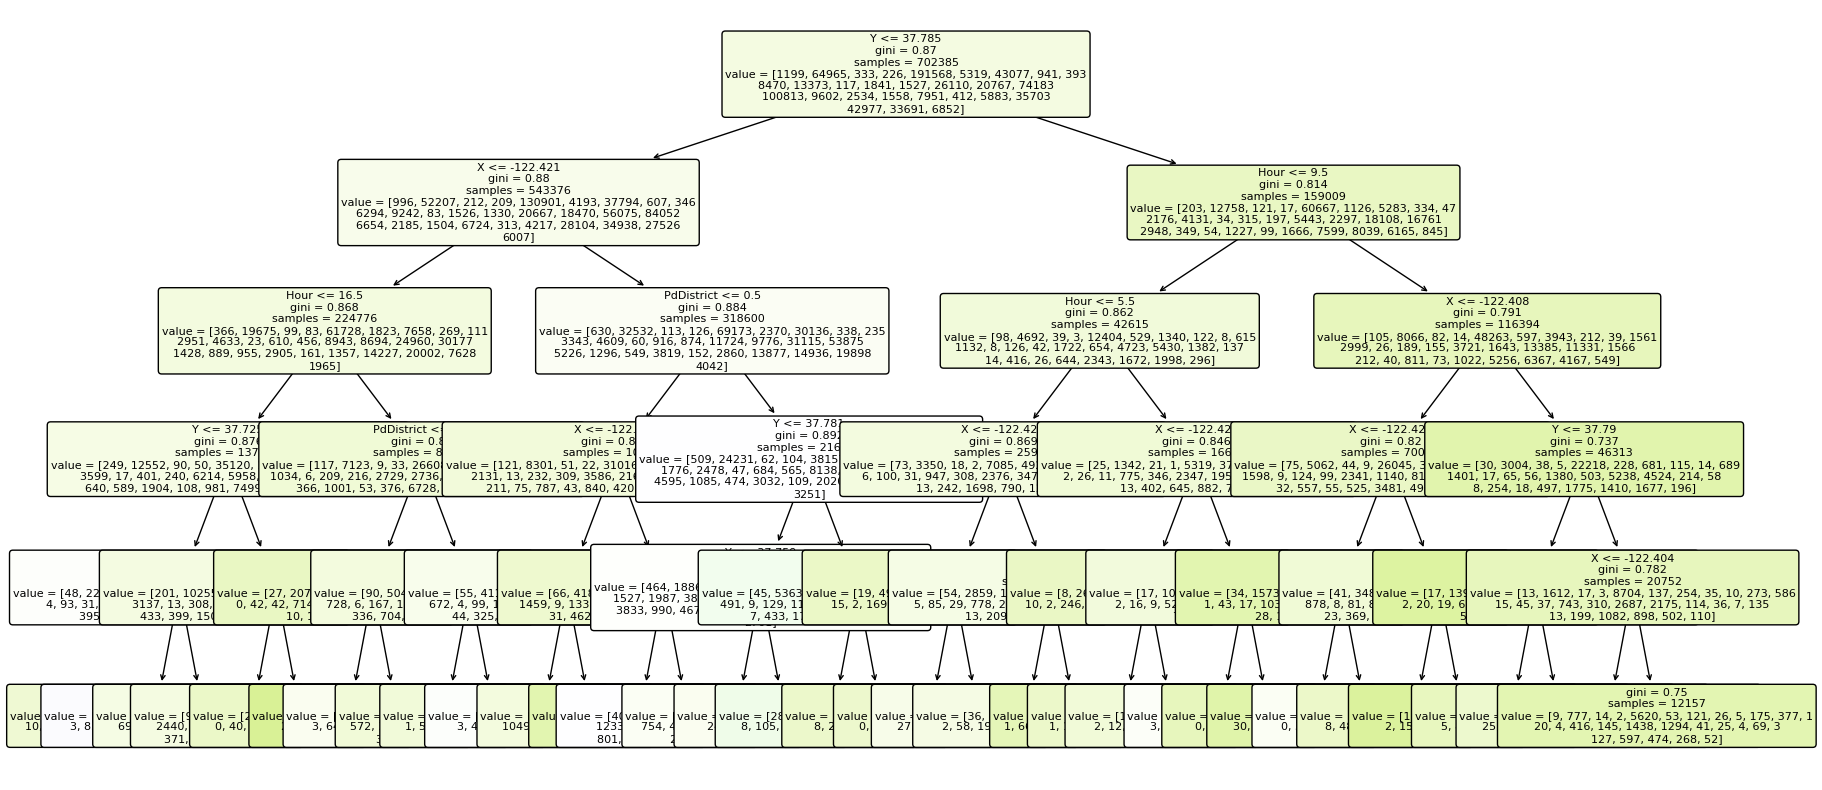

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

_tree = DecisionTreeClassifier(max_depth=5)
_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [ ]:
best_model = grid_search.best_estimator_

# Prediction & Evaluation
y_prob = best_model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = best_model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls, average='weighted'))

Estimated probs: [[1.13865932e-03 8.95500459e-02 3.85674931e-04 3.67309458e-04
  2.27621671e-01 6.26262626e-03 1.00514233e-01 8.44811754e-04
  3.12213039e-04 8.00734619e-03 1.38475666e-02 7.34618916e-05
  2.55280073e-03 2.25895317e-03 3.03213958e-02 1.10743802e-02
  8.46464646e-02 1.82056933e-01 5.38475666e-02 3.47107438e-03
  5.14233242e-04 8.31955923e-03 2.75482094e-04 8.85215794e-03
  3.79614325e-02 4.96051423e-02 6.48484848e-02 1.04683196e-02]
 [1.49901902e-03 7.67806362e-02 1.10221987e-04 2.86577166e-04
  2.96849856e-01 1.06474440e-02 2.93190486e-02 5.07021141e-04
  4.18843551e-04 6.63536362e-03 1.26093953e-02 6.61331922e-05
  2.27057293e-03 3.13030443e-03 3.20966426e-02 3.88863170e-02
  9.59151732e-02 1.17232105e-01 4.78363424e-03 2.46897251e-03
  6.78967440e-03 1.08899323e-02 7.27465115e-04 4.47501268e-03
  8.36143994e-02 1.24771289e-01 2.92529154e-02 6.96602958e-03]
 [6.23691362e-04 5.02962534e-02 8.90987660e-04 8.90987660e-05
  5.45640843e-01 2.58386421e-03 1.61714260e-02 3.38

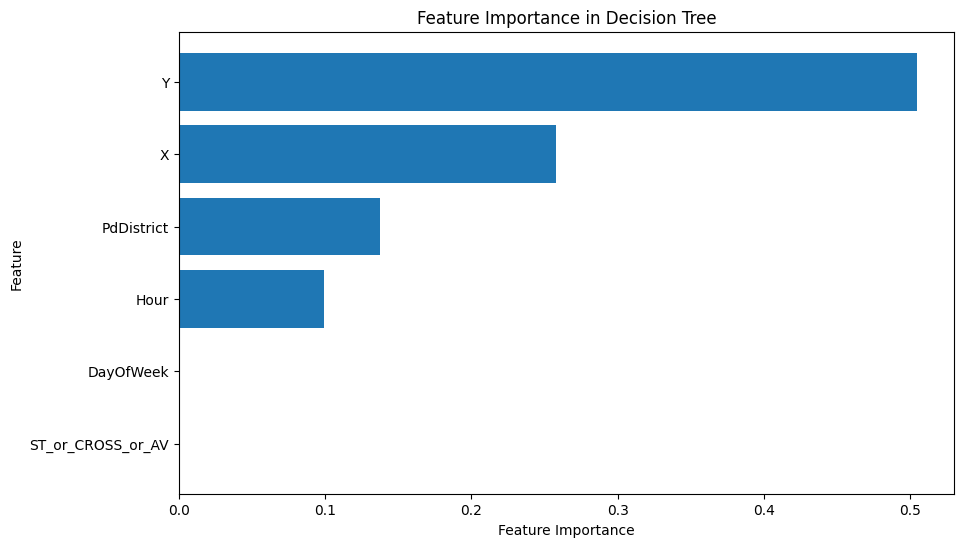

In [ ]:
# Feature importance
feature_importances = _tree.feature_importances_

# Feature importance visualization
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Test data Prediction

In [ ]:
test_c = test.copy()

# Delete 'Id' column
test_c.drop('Id', axis=1, inplace=True)

In [ ]:
# Preprocessng

test_c.loc[test_c['DayOfWeek']=='Monday','DayOfWeek']=0
test_c.loc[test_c['DayOfWeek']=='Tuesday','DayOfWeek']=1
test_c.loc[test_c['DayOfWeek']=='Wednesday','DayOfWeek']=2
test_c.loc[test_c['DayOfWeek']=='Thursday','DayOfWeek']=3
test_c.loc[test_c['DayOfWeek']=='Friday','DayOfWeek']=4
test_c.loc[test_c['DayOfWeek']=='Saturday','DayOfWeek']=5
test_c.loc[test_c['DayOfWeek']=='Sunday','DayOfWeek']=6

In [ ]:
test_c.loc[test_c['PdDistrict']=='SOUTHERN','PdDistrict']=0
test_c.loc[test_c['PdDistrict']=='MISSION','PdDistrict']=1
test_c.loc[test_c['PdDistrict']=='NORTHERN','PdDistrict']=2
test_c.loc[test_c['PdDistrict']=='BAYVIEW','PdDistrict']=3
test_c.loc[test_c['PdDistrict']=='CENTRAL','PdDistrict']=4
test_c.loc[test_c['PdDistrict']=='TENDERLOIN','PdDistrict']=5
test_c.loc[test_c['PdDistrict']=='INGLESIDE','PdDistrict']=6
test_c.loc[test_c['PdDistrict']=='TARAVAL','PdDistrict']=7
test_c.loc[test_c['PdDistrict']=='PARK','PdDistrict']=8
test_c.loc[test_c['PdDistrict']=='RICHMOND','PdDistrict']=9

In [ ]:
test_c['ST_or_CROSS_or_AV'] = test_c['Address'].apply(one_hot_encode)
test_c = test_c.drop(columns=['Address'])

In [ ]:
test_c['Dates'] = pd.to_datetime(test_c['Dates'])
test_c['Hour'] = test_c['Dates'].dt.hour
test_c = test_c.drop(columns=['Dates'])

In [ ]:
new_order = ['DayOfWeek', 'Hour', 'PdDistrict', 'ST_or_CROSS_or_AV', 'X', 'Y']

test_c = test_c[new_order]

In [ ]:
test_c

DayOfWeek  Hour PdDistrict  ST_or_CROSS_or_AV           X          Y
0              6    23          3                  1 -122.399588  37.735051
1              6    23          3                  1 -122.391523  37.732432
2              6    23          2                  1 -122.426002  37.792212
3              6    23          6                  1 -122.437394  37.721412
4              6    23          6                  1 -122.437394  37.721412
...          ...   ...        ...                ...         ...        ...
884257         2     0          1                  1 -122.408983  37.751987
884258         2     0          2                  1 -122.425342  37.792681
884259         2     0          6                  1 -122.445418  37.712075
884260         2     0          3                  1 -122.387394  37.739479
884261         2     0          7                  0 -122.489714  37.733950

[884262 rows x 6 columns]

In [ ]:
# Prediction
test_pred = best_model.predict(test_c)

In [ ]:

prediction = pd.DataFrame(test_pred, columns = ['Category_Prediction'])

prediction.replace(0, 'ARSON', inplace=True)
prediction.replace(1, 'ASSAULT', inplace=True)
prediction.replace(2, 'BAD CHECKS', inplace=True)
prediction.replace(3, 'BRIBERY', inplace=True)
prediction.replace(4, 'LARCENY/THEFT', inplace=True)
prediction.replace(5, 'DRIVING UNDER THE INFLUENCE/DRUNKENNESS', inplace=True)
prediction.replace(6, 'DRUG/NARCOTIC', inplace=True)
prediction.replace(5, 'DRIVING UNDER THE INFLUENCE/DRUNKENNESS', inplace=True)
prediction.replace(7, 'EMBEZZLEMENT', inplace=True)
prediction.replace(8, 'FAMILY OFFENSES', inplace=True)
prediction.replace(9, 'FORGERY/COUNTERFEITING', inplace=True)
prediction.replace(10, 'FRAUD', inplace=True)
prediction.replace(11, 'GAMBLING', inplace=True)
prediction.replace(12, 'KIDNAPPING', inplace=True)
prediction.replace(13, 'LIQUOR LAWS', inplace=True)
prediction.replace(14, 'SUSPICIOUS OCC', inplace=True)
prediction.replace(15, 'MISSING PERSON', inplace=True)
prediction.replace(16, 'NON-CRIMINAL', inplace=True)
prediction.replace(17, 'OTHER OFFENSES', inplace=True)
prediction.replace(18, 'SEXUAL ASSAULT', inplace=True)
prediction.replace(19, 'RECOVERED VEHICLE', inplace=True)
prediction.replace(20, 'RUNAWAY', inplace=True)
prediction.replace(21, 'SECONDARY CODES', inplace=True)
prediction.replace(22, 'SUICIDE', inplace=True)
prediction.replace(23, 'TREA', inplace=True)
prediction.replace(24, 'VANDALISM', inplace=True)
prediction.replace(25, 'VEHICLE THEFT', inplace=True)
prediction.replace(26, 'WARRANTS', inplace=True)
prediction.replace(27, 'WEAPON LAWS', inplace=True)

test['Category_prediction'] = prediction


In [ ]:
# Save the result
# test.to_csv('/content/drive/MyDrive/데이터사이언스_lab/crime_prediction.csv', index=False)

In [ ]:
# Load predict data
#pred = pd.read_csv('/content/drive/MyDrive/데이터사이언스_lab/crime_prediction.csv')
pred = test
pred

Id                Dates  DayOfWeek PdDistrict  \
0            0  2015-05-10 23:59:00     Sunday    BAYVIEW   
1            1  2015-05-10 23:51:00     Sunday    BAYVIEW   
2            2  2015-05-10 23:50:00     Sunday   NORTHERN   
3            3  2015-05-10 23:45:00     Sunday  INGLESIDE   
4            4  2015-05-10 23:45:00     Sunday  INGLESIDE   
...        ...                  ...        ...        ...   
884257  884257  2003-01-01 00:01:00  Wednesday    MISSION   
884258  884258  2003-01-01 00:01:00  Wednesday   NORTHERN   
884259  884259  2003-01-01 00:01:00  Wednesday  INGLESIDE   
884260  884260  2003-01-01 00:01:00  Wednesday    BAYVIEW   
884261  884261  2003-01-01 00:01:00  Wednesday    TARAVAL   

                            Address           X          Y Category_prediction  
0           2000 Block of THOMAS AV -122.399588  37.735051      OTHER OFFENSES  
1                3RD ST / REVERE AV -122.391523  37.732432      OTHER OFFENSES  
2            2000 Block of GOUGH ST -122.426002  37.792212       LARCENY/THEFT  
3          4700 Block of MISSION ST -122.437394  37.721412       LARCENY/THEFT  
4          4700 Block of MISSION ST -122.437394  37.721412       LARCENY/THEFT  
...                             ...         ...        ...                 ...  
884257      2600 Block of BRYANT ST -122.408983  37.751987      OTHER OFFENSES  
884258  1900 Block of WASHINGTON ST -122.425342  37.792681       LARCENY/THEFT  
884259     5500 Block of MISSION ST -122.445418  37.712075      OTHER OFFENSES  
884260      1500 Block of HUDSON AV -122.387394  37.739479      OTHER OFFENSES  
884261       1500 Block of SLOAT BL -122.489714  37.733950       LARCENY/THEFT  

[884262 rows x 8 columns]

In [ ]:
pred['Category_prediction'].value_counts()

Category_prediction
LARCENY/THEFT     643086
OTHER OFFENSES    165410
DRUG/NARCOTIC      75766
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category_prediction'>

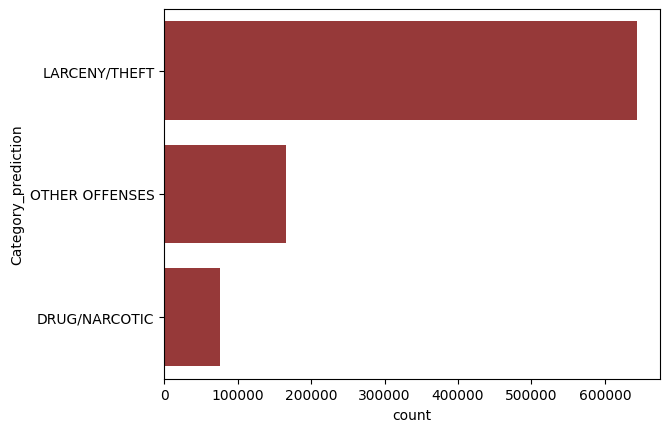

In [ ]:
# Visualize 'Category_prediction' values
sns.countplot(y='Category_prediction', data=pred, order=pred['Category_prediction'].value_counts().index[:20], color = 'brown')

In [ ]:
X_outliers=pred['X']==pred['X'].max()
Y_outliers=pred['Y']==pred['Y'].max()

outlier=pred[X_outliers&Y_outliers]
print(outlier.shape)
outlier

(76, 8)


Id                Dates DayOfWeek  PdDistrict  \
664733  664733  2005-12-20 14:57:00   Tuesday  TENDERLOIN   
664734  664734  2005-12-20 14:57:00   Tuesday  TENDERLOIN   
664826  664826  2005-12-20 07:36:00   Tuesday    RICHMOND   
664895  664895  2005-12-19 23:08:00    Monday  TENDERLOIN   
667226  667226  2005-12-06 09:40:00   Tuesday    RICHMOND   
...        ...                  ...       ...         ...   
830647  830647  2003-09-12 23:00:00    Friday    NORTHERN   
830648  830648  2003-09-12 23:00:00    Friday    NORTHERN   
836254  836254  2003-08-16 17:30:00  Saturday    SOUTHERN   
836255  836255  2003-08-16 17:30:00  Saturday    SOUTHERN   
861864  861864  2003-04-12 11:30:00  Saturday     TARAVAL   

                                          Address      X     Y  \
664733              7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
664734              7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
664826             GEARY BL / AVENUE OF THE PALMS -120.5  90.0   
664895                    EDDY ST / 5THSTNORTH ST -120.5  90.0   
667226             GEARY BL / AVENUE OF THE PALMS -120.5  90.0   
...                                           ...    ...   ...   
830647                      AUSTIN ST / LARKIN ST -120.5  90.0   
830648                      AUSTIN ST / LARKIN ST -120.5  90.0   
836254        SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0   
836255        SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0   
861864  LOWER GREAT HY / MARTIN LUTHER KING JR DR -120.5  90.0   

       Category_prediction  
664733       LARCENY/THEFT  
664734       LARCENY/THEFT  
664826       LARCENY/THEFT  
664895       LARCENY/THEFT  
667226       LARCENY/THEFT  
...                    ...  
830647       LARCENY/THEFT  
830648       LARCENY/THEFT  
836254       LARCENY/THEFT  
836255       LARCENY/THEFT  
861864       LARCENY/THEFT  

[76 rows x 8 columns]

In [ ]:
non_outliers=pred[~(X_outliers&Y_outliers)]

<Axes: xlabel='count', ylabel='PdDistrict'>

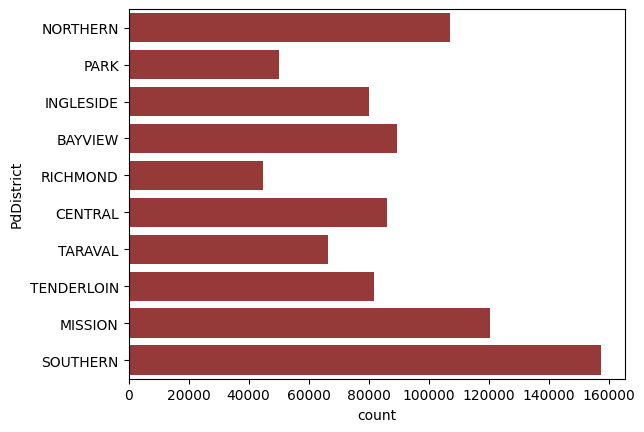

In [ ]:
sns.countplot(data=non_outliers, y='PdDistrict', order = category_order, color = 'brown')

The area where crime occurred the most was SOUTHERN, which remained unchanged compared to the train data, followed by MISSION and NORTHHERN.

<ipython-input-186-236248511813>:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


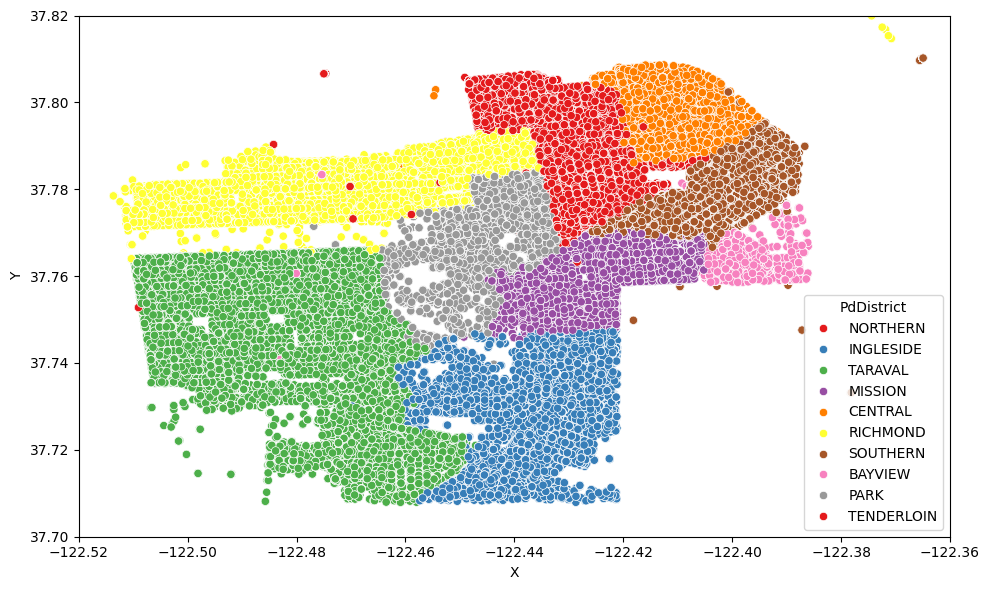

In [ ]:
theft_df = non_outliers[non_outliers['Category_prediction'] == 'LARCENY/THEFT']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))

sns.scatterplot(x='X', y='Y', hue='PdDistrict', data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

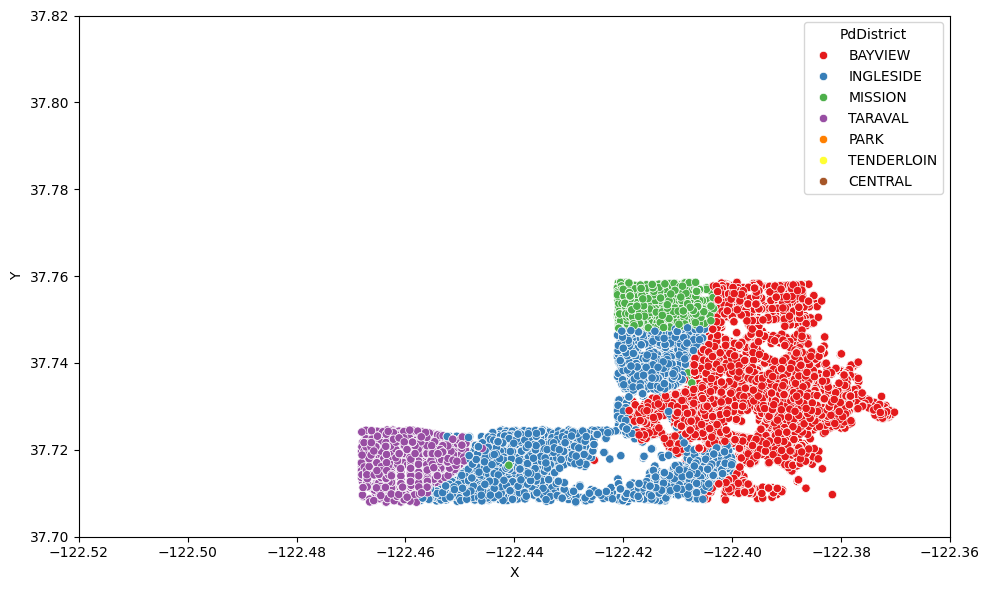

In [ ]:
theft_df = non_outliers[non_outliers['Category_prediction'] == 'OTHER OFFENSES']
theft_df.shape

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='X', y='Y', hue='PdDistrict', data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()

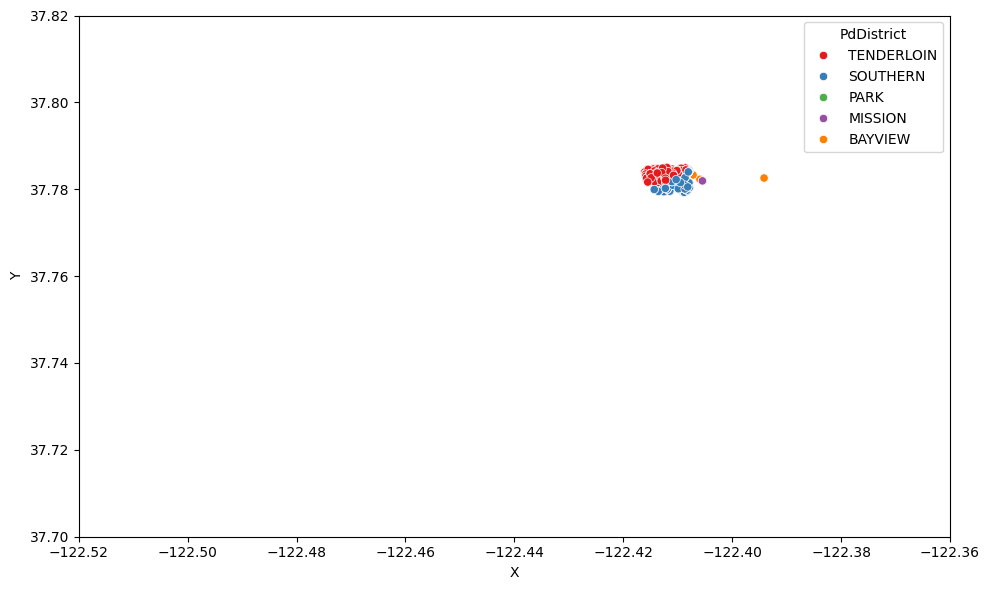

In [ ]:
theft_df = non_outliers[non_outliers['Category_prediction'] == 'DRUG/NARCOTIC']
theft_df.shape

fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x='X', y='Y', hue='PdDistrict', data=theft_df, palette='Set1')
plt.xlim(-122.52, -122.36)  # x-axis range settings
plt.ylim(37.70, 37.82)  # y-axis range settings

plt.tight_layout()
plt.show()